# Практична 7
Лесняк А, 559мн

## Дослідити залежність результатів від параметру degree (Polynomial support vector classifier (SVC)).

In [16]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [17]:
np.random.seed(0)
features = np.random.randn(200, 2)
target_xor = np.logical_xor(features[:, 0] > 0 , features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [37]:
def plot_decision_regions(X, y, classifier, ax):
    cmap = ListedColormap(["red", "blue"])
    xx1, xx2 = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.02),
                           np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker="+", label=cl)

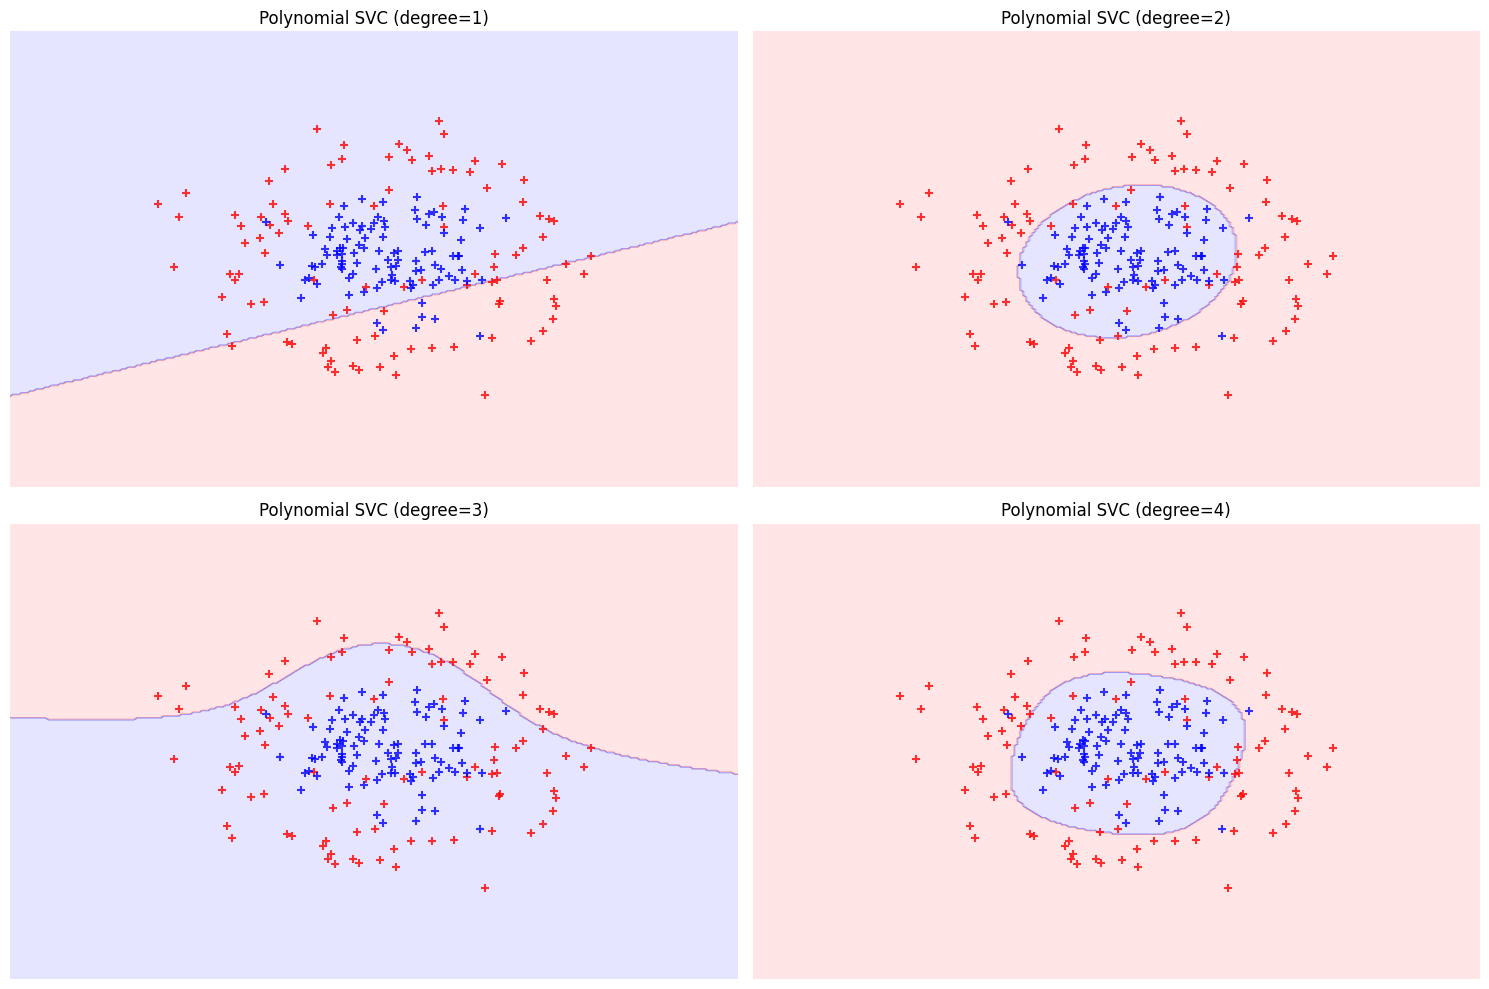

In [38]:
degrees = [1, 2, 3, 4]  # Значення параметра degree, які ми будемо досліджувати

fig, axs = plt.subplots(2, len(degrees) // 2, figsize=(15, 10))

for i, degree in enumerate(degrees):
    row = i // (len(degrees) // 2)
    col = i % (len(degrees) // 2)
    
    poly_svc = SVC(kernel="poly", random_state=0, degree=degree, gamma=1, C=1)
    poly_model = poly_svc.fit(features, target)

    axs[row, col].set_title(f"Polynomial SVC (degree={degree})")
    plot_decision_regions(features, target, classifier=poly_svc, ax=axs[row, col])
    axs[row, col].axis("off")

plt.tight_layout()
plt.show()

## Дослідити залежність результатів від параметру noise (Data).

In [28]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

In [39]:
# Function to plot decision regions
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-1.5, 1.5, 0.1), np.arange(-1.5, 1.5, 0.1))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

Noise Level: 0.1


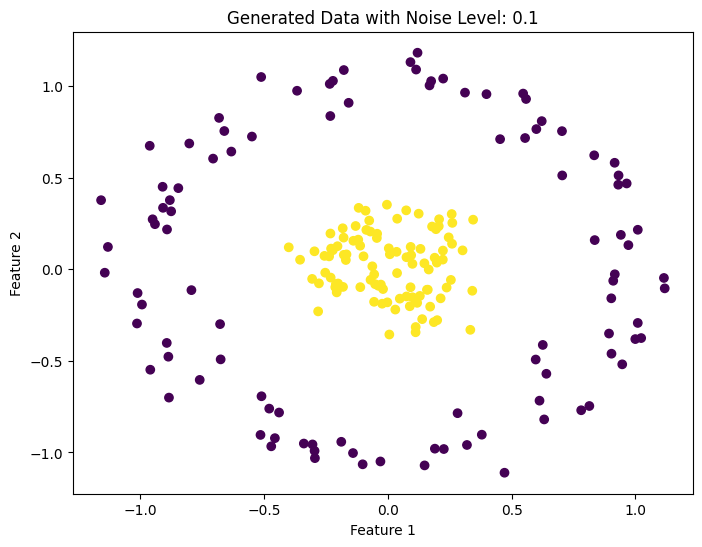

Linear
  accuracy: 0.64
  precision: 0.5839962651727357
  recall: 0.99
  f1: 0.733914381914382



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


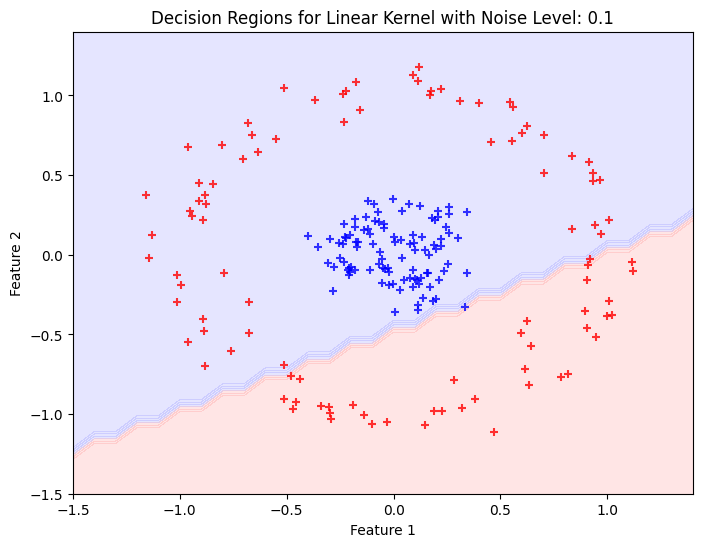

RBF
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  f1: 1.0



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


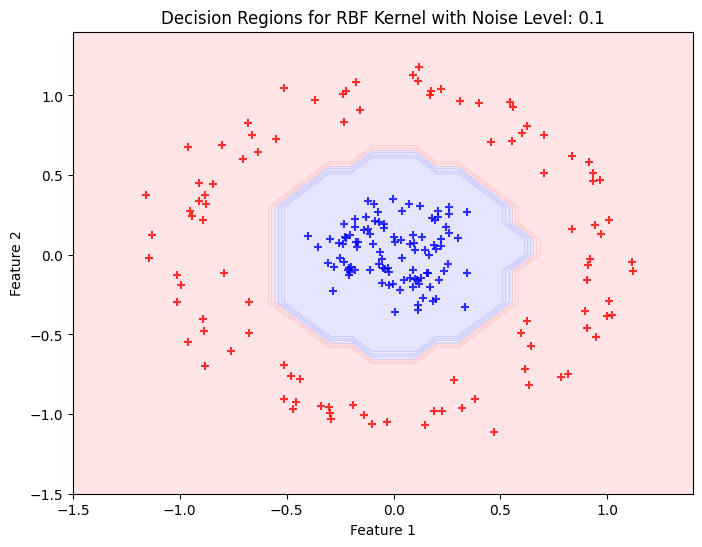

Polynomial
  accuracy: 1.0
  precision: 1.0
  recall: 1.0
  f1: 1.0



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


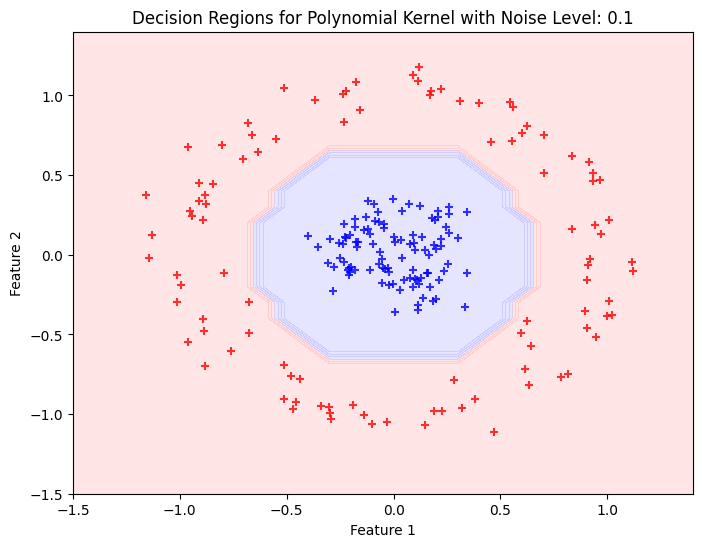

Sigmoid
  accuracy: 0.5900000000000001
  precision: 0.5548957360722067
  recall: 0.9
  f1: 0.6846300492257941



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


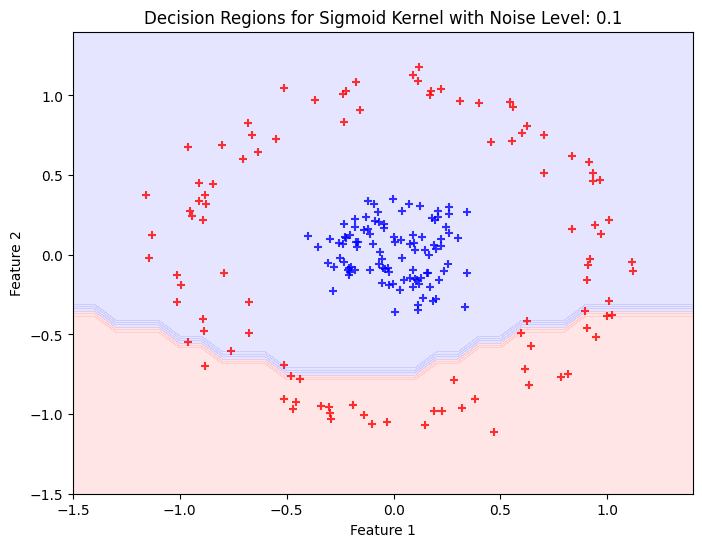

Noise Level: 0.2


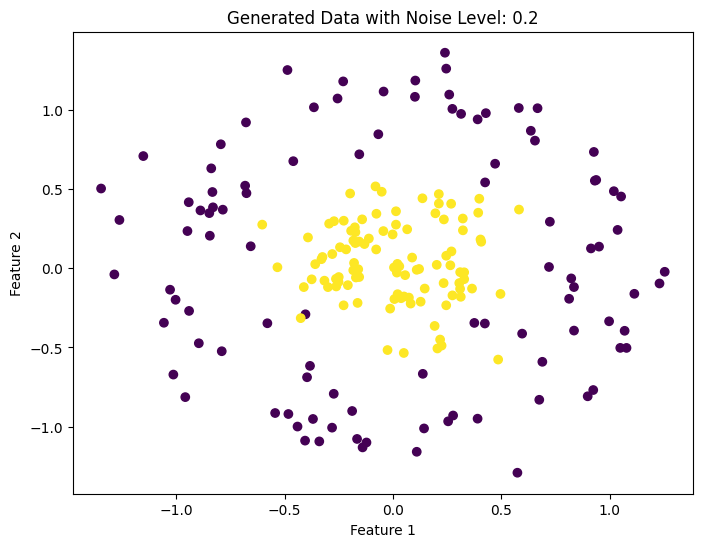

Linear
  accuracy: 0.615
  precision: 0.5726515151515151
  recall: 0.9099999999999999
  f1: 0.7027808417997097



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


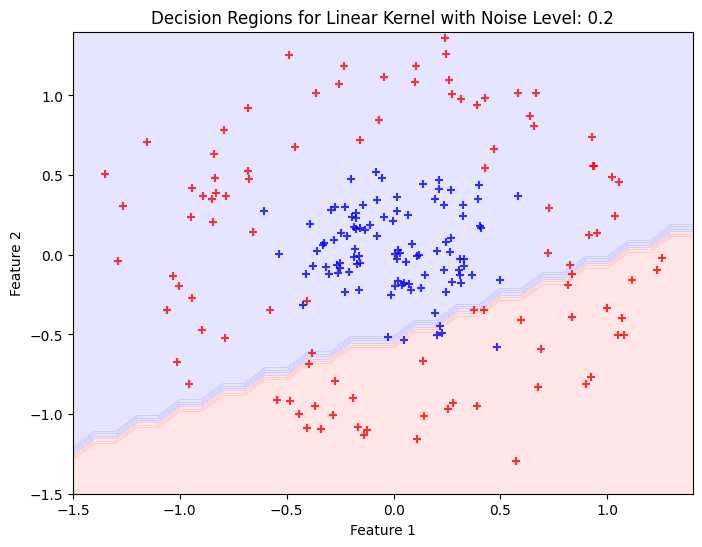

RBF
  accuracy: 0.9650000000000001
  precision: 0.9532467532467533
  recall: 0.9800000000000001
  f1: 0.9658357902260342



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


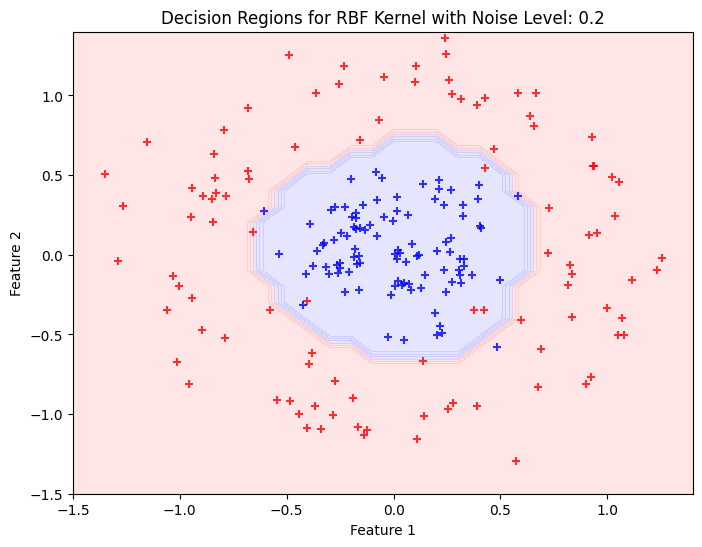

Polynomial
  accuracy: 0.9450000000000001
  precision: 0.9190476190476191
  recall: 0.9800000000000001
  f1: 0.9476718403547671



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


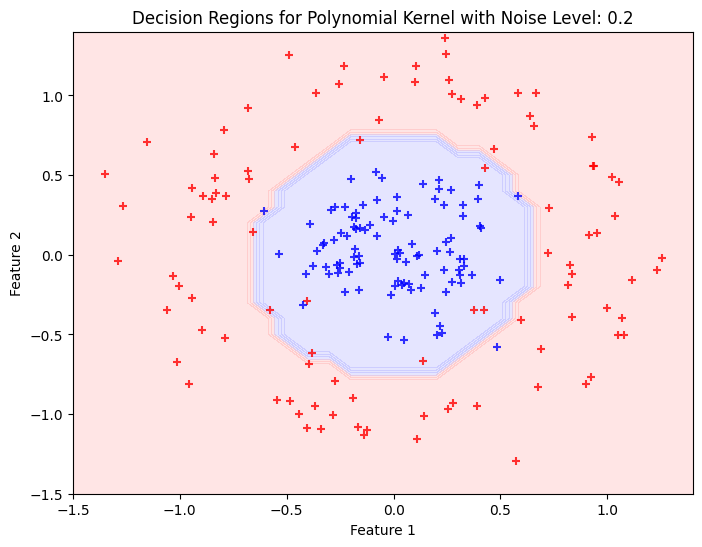

Sigmoid
  accuracy: 0.5650000000000001
  precision: 0.5291857864912892
  recall: 0.86
  f1: 0.6505814192743136



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


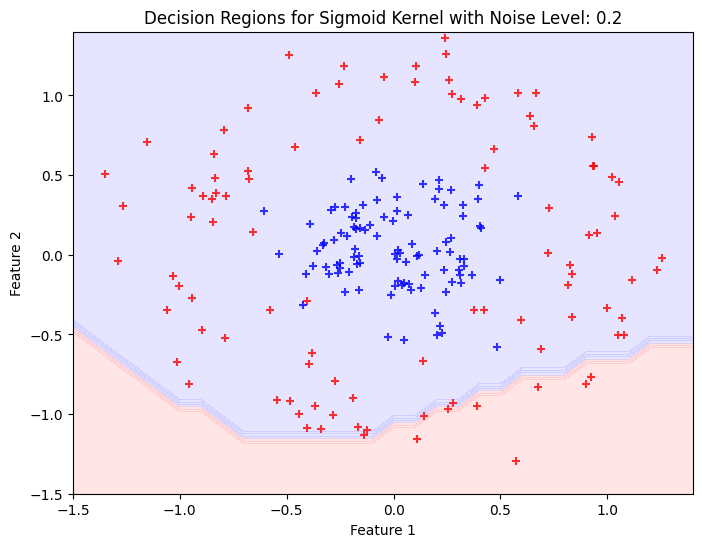

Noise Level: 0.3


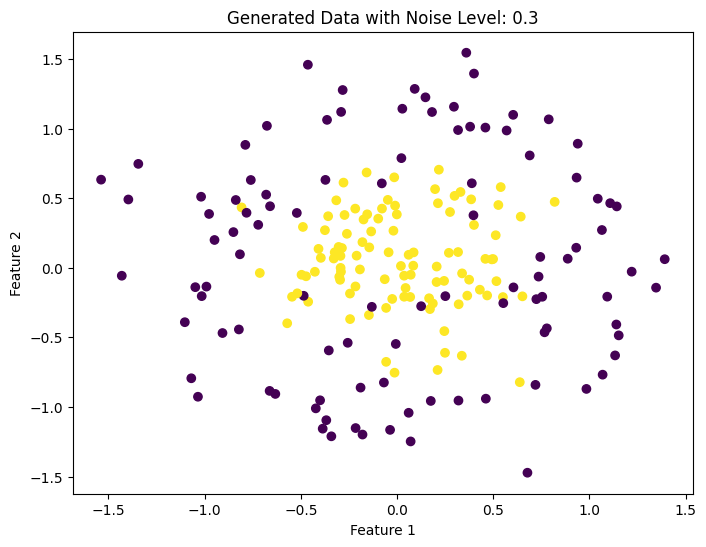

Linear
  accuracy: 0.54
  precision: 0.523365770306816
  recall: 0.79
  f1: 0.6286964334544318



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


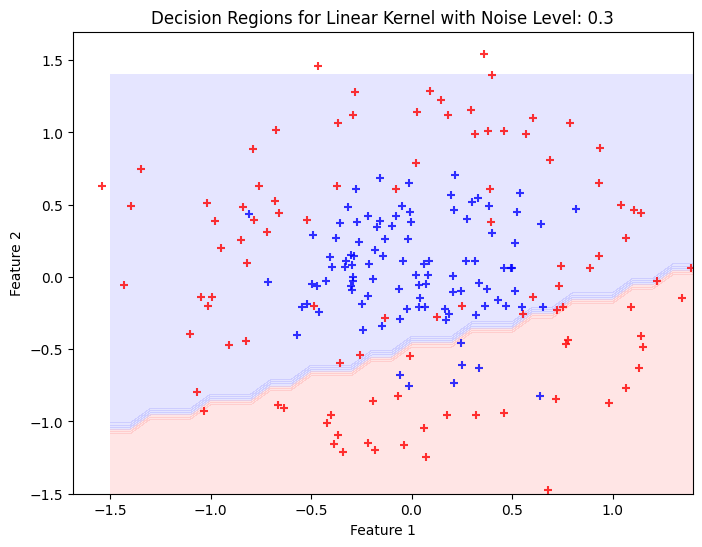

RBF
  accuracy: 0.8799999999999999
  precision: 0.8612918660287081
  recall: 0.9099999999999999
  f1: 0.8828693528693528



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


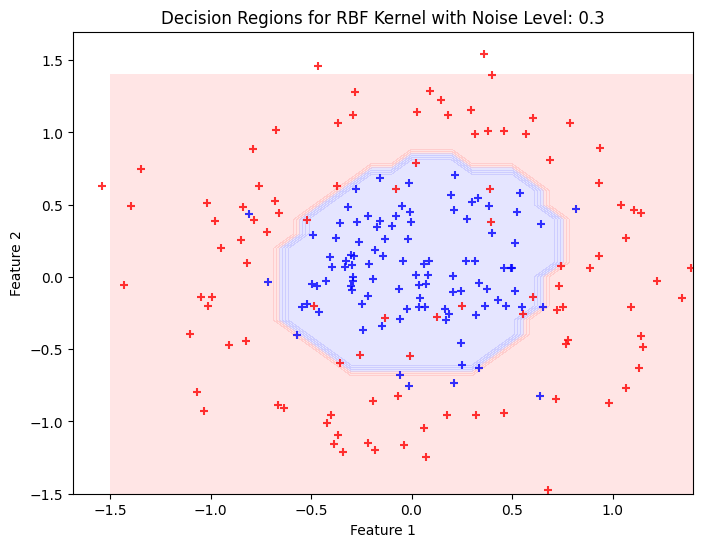

Polynomial
  accuracy: 0.9
  precision: 0.8528853754940713
  recall: 0.9700000000000001
  f1: 0.9071244001476559



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


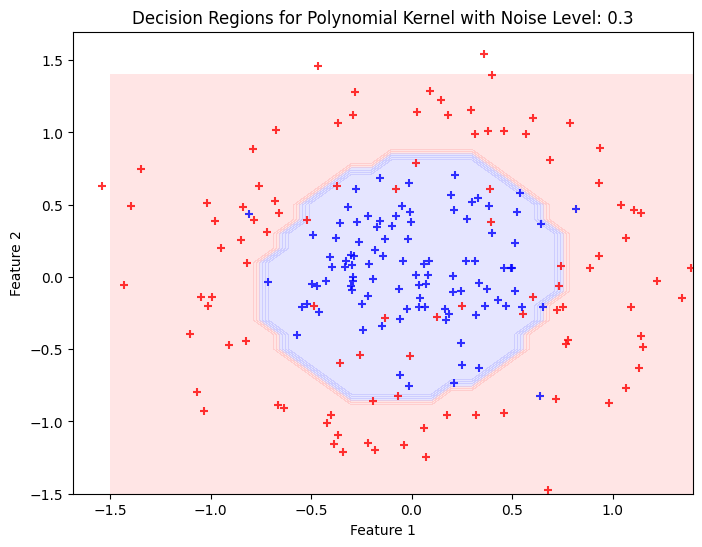

Sigmoid
  accuracy: 0.5700000000000001
  precision: 0.5501626222214457
  recall: 0.78
  f1: 0.6383135366614743



C:\Users\Todmount\AppData\Local\Temp\ipykernel_14556\2704670368.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


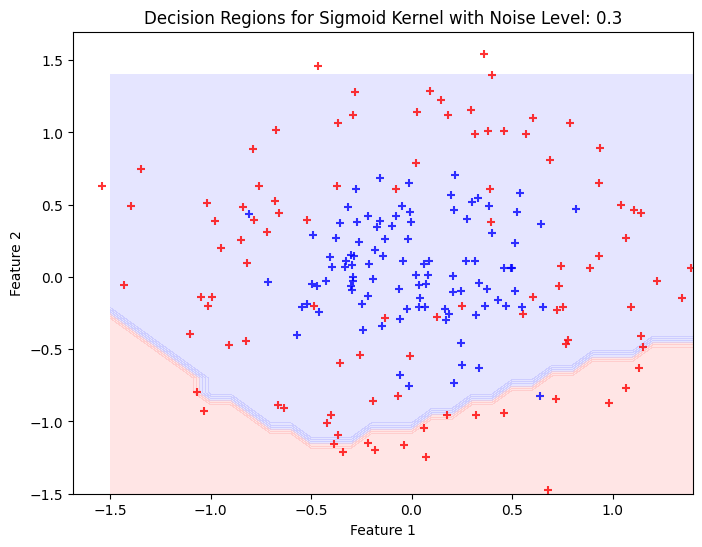

In [40]:
noise_levels = [0.1, 0.2, 0.3]

# Iterate over noise levels
for noise in noise_levels:
    print(f"Noise Level: {noise}")

    # Generate data with the specified noise level
    features, target = make_circles(n_samples=200, random_state=42, factor=0.2, noise=noise)

    # Plot the generated data
    plt.figure(figsize=(8, 6))
    plt.scatter(features[:, 0], features[:, 1], c=target)
    plt.title(f"Generated Data with Noise Level: {noise}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    # Define SVM models
    models = {'Linear': SVC(kernel="linear", random_state=0, C=1),
              'RBF': SVC(kernel="rbf", random_state=0, gamma=1, C=1),
              'Polynomial': SVC(kernel="poly", random_state=0, degree=2, gamma=1, C=1),
              'Sigmoid': SVC(kernel="sigmoid", random_state=0, gamma=1, C=1)}

    # Cross-validate each model and print scores
    for name, model in models.items():
        print(name)
        for metric in ['accuracy', 'precision', 'recall', 'f1']:
            score = cross_val_score(model, features, target, scoring=metric)
            print(f'  {metric}: {score.mean()}')
        print()

        # Fit the model and plot decision regions
        model.fit(features, target)
        plt.figure(figsize=(8, 6))
        plot_decision_regions(features, target, classifier=model)
        plt.title(f"Decision Regions for {name} Kernel with Noise Level: {noise}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

## Замінити make_circles на make_moons й провести відповідний аналіз

C:\Users\Todmount\AppData\Local\Temp\ipykernel_8868\366264113.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


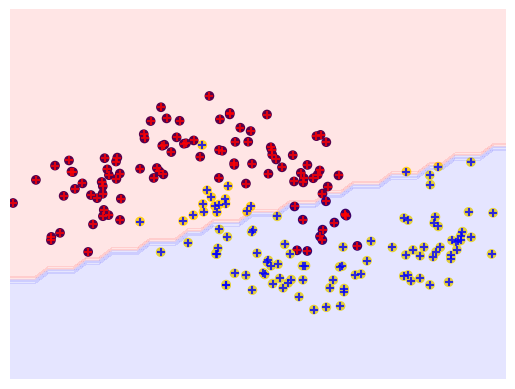

C:\Users\Todmount\AppData\Local\Temp\ipykernel_8868\366264113.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


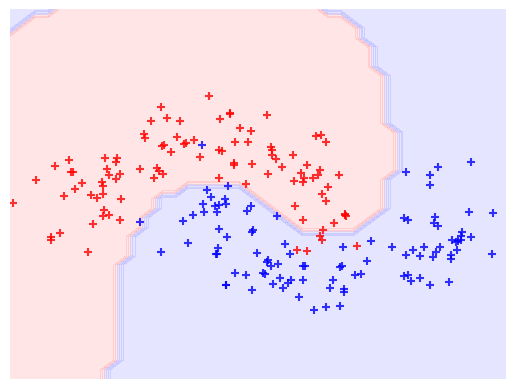

C:\Users\Todmount\AppData\Local\Temp\ipykernel_8868\366264113.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


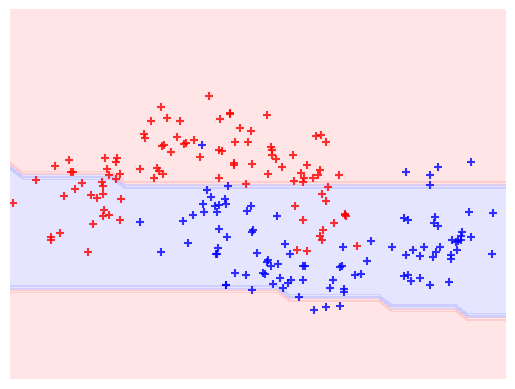

C:\Users\Todmount\AppData\Local\Temp\ipykernel_8868\366264113.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


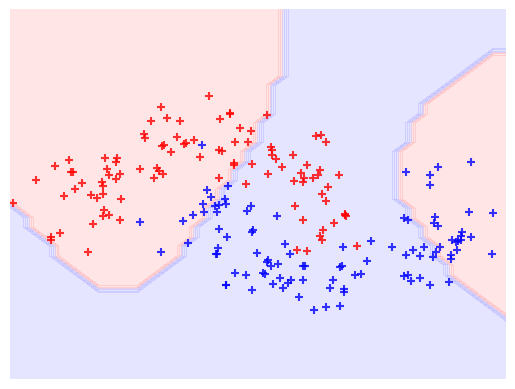

Linear
  accuracy: 0.85
  precision: 0.8658228905597326
  recall: 0.8300000000000001
  f1: 0.8467848326256542

RBF
  accuracy: 0.9550000000000001
  precision: 0.9439130434782609
  recall: 0.9700000000000001
  f1: 0.9560465116279071

Polynomial
  accuracy: 0.765
  precision: 0.7129132706374085
  recall: 0.9
  f1: 0.7938346557191542

Sigmoid
  accuracy: 0.6199999999999999
  precision: 0.6228720840562946
  recall: 0.62
  f1: 0.6174134864038308



In [3]:
# Imports
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

# Data
features, target = make_moons(n_samples=200, random_state=42, noise=0.2)

_, ax = plt.subplots()
scatter = ax.scatter(features[:, 0], features[:, 1], c=target)

# Color regions
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xxl, xx2 = np.meshgrid(np.arange(-1.5, 2.5, 0.1), np.arange(-1.5, 2.5, 0.1))
    Z = classifier.predict(np.array([xxl.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xxl.shape)
    plt.contourf(xxl, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

# Linear support vector classifier (SVC)
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# Fit model
linear_model = svc_linear.fit(features, target)

# Visualize
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()

# RBF support vector classifier (SVC)
rbf_svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

rbf_model = rbf_svc.fit(features, target)

plot_decision_regions(features, target, classifier=rbf_svc)
plt.axis("off")
plt.show()

# Polynomial support vector classifier (SVC)
poly_svc = SVC(kernel="poly", random_state=0, degree=2, gamma=1, C=1)

poly_model = poly_svc.fit(features, target)

plot_decision_regions(features, target, classifier=poly_svc)
plt.axis("off")
plt.show()

# Sigmoid support vector classifier (SVC)
sigm_svc = SVC(kernel="sigmoid", random_state=0, gamma=1, C=1)

sigm_model = sigm_svc.fit(features, target)

plot_decision_regions(features, target, classifier=sigm_svc)
plt.axis("off")
plt.show()

# Models
models = {'Linear': SVC(kernel="linear", random_state=0, C=1),
          'RBF': SVC(kernel="rbf", random_state=0, gamma=1, C=1),
          'Polynomial': SVC(kernel="poly", random_state=0, degree=2, gamma=1, C=1),
          'Sigmoid': SVC(kernel="sigmoid", random_state=0, gamma=1, C=1)}

# Indicators
indicators = ['accuracy', 'precision', 'recall', 'f1']

for name, model in models.items():
    print(name)

    for metric in indicators:
        score = cross_val_score(model, features, target, scoring=metric, cv=5)
        print(f'  {metric}: {score.mean()}')

    print()
